# Read in packages

In [1]:
# idk what all ill need so start w just this
from xgboost import XGBRegressor
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# its only overfitting if ur validation error goes UP while training goes down or stays the same

In [3]:
data = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/3_06_24/buoy.txt', delim_whitespace = True)



In [4]:
# early stopping example code

# bst = XGBRegressor(n_estimators=50, learning_rate=0.2,early_stopping_rounds=10)
# bst = bst.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Directions

Using these data, train models to predict wave height as a function of dominant wave
period, average wave period, the direction from which the waves at the dominant
period are coming, and sea surface temperature. Use the XGBoost package for
boosting.
1. Fit a boosted regression tree with 25 boosting iterations. Compare with a
baseline linear model of your choice. Which model performs best? Report
performance on the training, validation, and test dataset.


- Boost Training MSE: 0.06501119000347665
- Boost Test MSE: 0.09860488645376232
- Boost Validation MSE: 0.09557869272965319
- Linear Training MSE: 1.7418629878024559
- Linear Test MSE: 1.1397717971709758
- Linear Validation MSE: 2.69162835897984


2. What cost function are you using for each model?

- Linear regression uses OLS and xgboost uses reg:squarederror.

3. What (if any) hyperparameters did you optimize, and why?

- I think the only hyperparameters here to optimize are the boosting iterations, which had to be 25 here, and then learning rate. I made learning rate 0.4 because I messed around with it and that had the lowest error for all testing sets. 

4. Train a boosted regression tree on this prediction task with 2, 10, 25, 50, 100,
250, 500, & 1,000 boosting iterations. Plot the training and validation error as a
function of number of iterations.


5. Do you have evidence of overfitting to the training dataset with 1,000 boosting
iterations?

- A bit. Both errors are still going down from 50 to 100 iterations, but then from 110 to 250 the validation error goes up again by .004. Then for 500 and 1000 the validatio error goes up a bit again while the training error continues to drop. You can see the divergence in the errors on the plot. 

6. Retrain the boosted regression tree using early stopping with a tolerance of 10.
How many boosting iterations were optimal?

- About 50. After that it looks like none of the errors get any better

# Getting rid of not needed cols and rename 

In [5]:
cols = ['WVHT','DPD','APD','MWD','WTMP']

data = data[cols]

data.columns = ['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction','SST']

# Putting data into arrays

In [6]:
X = data[['Dominant Wave Period','Average Wave Period','Dom Direction', 'SST']].copy()
X = X.to_numpy()
X

array([[ 12.5 ,   7.69, 269.  ,  15.3 ],
       [ 11.76,   7.34, 272.  ,  15.3 ],
       [ 12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [ 13.33,  10.5 , 268.  ,  16.8 ],
       [ 14.29,  10.32, 271.  ,  16.8 ],
       [ 12.5 ,  10.54, 271.  ,  16.9 ]])

In [7]:
y = data['Wave Height']
y = y.to_numpy()
y

array([1.12, 1.16, 1.2 , ..., 1.79, 1.66, 1.7 ])

# Train test val splits

In [8]:
# training and remaining instead of train and test, remaining will be what i then pull the next stuff from
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4)

# now i can split the remaining data into the testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5)


# X_temp_train is training data, X_test as testing data, X_val is validation data
# y_temp_train is training data, y_test as testing data, y_val is validation data

# Define my boost function thing

In [9]:
boost = XGBRegressor(n_estimators=25, learning_rate=0.4)
boost = boost.fit(X_train, y_train)

# Making dfs of only the different sets

In [10]:
colz = ['Dominant Wave Period','Average Wave Period','Dom Direction', 'SST']

Train_df = pd.DataFrame(X_train, columns=colz)
Train_df['Wave Height'] = y_train

Test_df = pd.DataFrame(X_test, columns=colz)
Test_df['Wave Height'] = y_test

Val_df = pd.DataFrame(X_val, columns=colz)
Val_df['Wave Height'] = y_val

# Baseline linear model

In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Errors

In [12]:
####### boost 

# train MSE
whPred_train = boost.predict(X_train)
Train_df['whPred_train'] = whPred_train
boost_train_mse = mean_squared_error(Train_df['Wave Height'],Train_df['whPred_train'])
print("Boost Training MSE:", boost_train_mse)

# test MSE
whPred_test = boost.predict(X_test)
Test_df['whPred_test'] = whPred_test
boost_test_mse = mean_squared_error(Test_df['Wave Height'],Test_df['whPred_test'])
print("Boost Test MSE:", boost_test_mse)


# val MSE
whPred_val = boost.predict(X_val)
Val_df['whPred_val'] = whPred_val
boost_val_mse = mean_squared_error(Val_df['Wave Height'],Val_df['whPred_val'])
print("Boost Validation MSE:", boost_val_mse)

####### linear

# train MSE
whPred_train2 = reg.predict(X_train)
Train_df['whPred_train2'] = whPred_train2
lin_train_mse = mean_squared_error(Train_df['Wave Height'],Train_df['whPred_train2'])
print("Linear Training MSE:", lin_train_mse)

# test MSE
whPred_test2 = reg.predict(X_test)
Test_df['whPred_test2'] = whPred_test2
lin_test_mse = mean_squared_error(Test_df['Wave Height'],Test_df['whPred_test2'])
print("Linear Test MSE:", lin_test_mse)


# val MSE
whPred_val2 = reg.predict(X_val)
Val_df['whPred_val2'] = whPred_val2
lin_val_mse = mean_squared_error(Val_df['Wave Height'],Val_df['whPred_val2'])
print("Linear Validation MSE:", lin_val_mse)

Boost Training MSE: 0.07068717502038258
Boost Test MSE: 0.1041193249778438
Boost Validation MSE: 0.09773434480842606
Linear Training MSE: 1.4359575251216241
Linear Test MSE: 2.7772949825898925
Linear Validation MSE: 2.739677572662105


# Different boosting iterations

In [13]:
# 2, 10, 25, 50, 100, 250, 500, & 1,000

boost1 = XGBRegressor(n_estimators=2, learning_rate=0.4)
boost2 = XGBRegressor(n_estimators=10, learning_rate=0.4)
boost3 = XGBRegressor(n_estimators=25, learning_rate=0.4)
boost4 = XGBRegressor(n_estimators=50, learning_rate=0.4)
boost5 = XGBRegressor(n_estimators=100, learning_rate=0.4)
boost6 = XGBRegressor(n_estimators=250, learning_rate=0.4)
boost7 = XGBRegressor(n_estimators=500, learning_rate=0.4)
boost8 = XGBRegressor(n_estimators=1000, learning_rate=0.4)


In [14]:
boost1 = boost1.fit(X_train, y_train)
boost2 = boost2.fit(X_train, y_train)
boost3 = boost3.fit(X_train, y_train)
boost4 = boost4.fit(X_train, y_train)
boost5 = boost5.fit(X_train, y_train)
boost6 = boost6.fit(X_train, y_train)
boost7 = boost7.fit(X_train, y_train)
boost8 = boost8.fit(X_train, y_train)


# Errors

In [15]:
# training error

mse_results = []
num_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]  

boosts = [boost1, boost2, boost3, boost4, boost5, boost6, boost7, boost8]

#iterate
for i, boost in enumerate(boosts):
    whPred_train = boost.predict(X_train)
    mse = mean_squared_error(y_train, whPred_train)
    mse_results.append({'Number of Iterations': num_iterations[i], 'MSE': mse})

# df from results
mse_df = pd.DataFrame(mse_results)


In [16]:
# validation error

mse_results = []
num_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]  

boosts = [boost1, boost2, boost3, boost4, boost5, boost6, boost7, boost8]

#iterate
for i, boost in enumerate(boosts):
    whPred_val = boost.predict(X_val)
    mse = mean_squared_error(y_val, whPred_val)
    # Store results
    mse_results.append({'Number of Iterations': num_iterations[i], 'MSE2': mse})

# df from results
mse_df2 = pd.DataFrame(mse_results)



In [17]:
all_df= mse_df.merge(mse_df2, on=['Number of Iterations'])

In [18]:
all_df

,Number of Iterations,MSE,MSE2
0,2,0.808141,2.147513
1,10,0.091838,0.112836
2,25,0.070687,0.097734
3,50,0.051638,0.096017
4,100,0.031223,0.094983
5,250,0.012904,0.098879
6,500,0.004703,0.104074
7,1000,0.001140,0.108791


# Plot

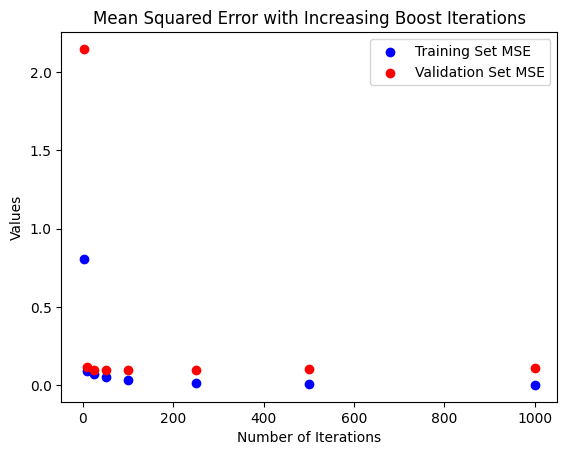

In [19]:
plt.scatter(all_df['Number of Iterations'], all_df['MSE'], color='blue', label='Training Set MSE')
plt.scatter(all_df['Number of Iterations'], all_df['MSE2'], color='red', label='Validation Set MSE')

plt.xlabel('Number of Iterations')
plt.ylabel('Values')
plt.title('Mean Squared Error with Increasing Boost Iterations')

plt.legend()

plt.show()

# Early stopping

In [20]:
# 2, 10, 25, 50, 100, 250, 500, & 1,000

boosty1 = XGBRegressor(n_estimators=2, learning_rate=0.4,early_stopping_rounds=10)
boosty2 = XGBRegressor(n_estimators=10, learning_rate=0.4,early_stopping_rounds=10)
boosty3 = XGBRegressor(n_estimators=25, learning_rate=0.4,early_stopping_rounds=10)
boosty4 = XGBRegressor(n_estimators=50, learning_rate=0.4,early_stopping_rounds=10)
boosty5 = XGBRegressor(n_estimators=100, learning_rate=0.4,early_stopping_rounds=10)
boosty6 = XGBRegressor(n_estimators=250, learning_rate=0.4,early_stopping_rounds=10)
boosty7 = XGBRegressor(n_estimators=500, learning_rate=0.4,early_stopping_rounds=10)
boosty8 = XGBRegressor(n_estimators=1000, learning_rate=0.4,early_stopping_rounds=10)

In [21]:
boosty1 = boosty1.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544


In [22]:
boosty2 = boosty2.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591


In [23]:
boosty3 = boosty3.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262


In [24]:
boosty4 = boosty4.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262
[25]	validation_0-rmse:0.31245
[26]	validation_0-rmse:0.31137
[27]	validation_0-rmse:0.31167
[28]	validation_0-rmse:0.31162
[29]	validation_0-rmse:0.31153
[30]	validation_0-rmse:0.31167
[31]	validation_0-rmse:0.31020
[32]	validation_0-

In [25]:
boosty5 = boosty5.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262
[25]	validation_0-rmse:0.31245
[26]	validation_0-rmse:0.31137
[27]	validation_0-rmse:0.31167
[28]	validation_0-rmse:0.31162
[29]	validation_0-rmse:0.31153
[30]	validation_0-rmse:0.31167
[31]	validation_0-rmse:0.31020
[32]	validation_0-

In [26]:
boosty6 = boosty6.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262
[25]	validation_0-rmse:0.31245
[26]	validation_0-rmse:0.31137
[27]	validation_0-rmse:0.31167
[28]	validation_0-rmse:0.31162
[29]	validation_0-rmse:0.31153
[30]	validation_0-rmse:0.31167
[31]	validation_0-rmse:0.31020
[32]	validation_0-

In [27]:
boosty7 = boosty7.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262
[25]	validation_0-rmse:0.31245
[26]	validation_0-rmse:0.31137
[27]	validation_0-rmse:0.31167
[28]	validation_0-rmse:0.31162
[29]	validation_0-rmse:0.31153
[30]	validation_0-rmse:0.31167
[31]	validation_0-rmse:0.31020
[32]	validation_0-

In [28]:
boosty8 = boosty8.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:2.06545
[1]	validation_0-rmse:1.46544
[2]	validation_0-rmse:1.05405
[3]	validation_0-rmse:0.77609
[4]	validation_0-rmse:0.59155
[5]	validation_0-rmse:0.47466
[6]	validation_0-rmse:0.40606
[7]	validation_0-rmse:0.36800
[8]	validation_0-rmse:0.34711
[9]	validation_0-rmse:0.33591
[10]	validation_0-rmse:0.32917
[11]	validation_0-rmse:0.32491
[12]	validation_0-rmse:0.32318
[13]	validation_0-rmse:0.32135
[14]	validation_0-rmse:0.32094
[15]	validation_0-rmse:0.31969
[16]	validation_0-rmse:0.31633
[17]	validation_0-rmse:0.31722
[18]	validation_0-rmse:0.31664
[19]	validation_0-rmse:0.31671
[20]	validation_0-rmse:0.31490
[21]	validation_0-rmse:0.31424
[22]	validation_0-rmse:0.31291
[23]	validation_0-rmse:0.31286
[24]	validation_0-rmse:0.31262
[25]	validation_0-rmse:0.31245
[26]	validation_0-rmse:0.31137
[27]	validation_0-rmse:0.31167
[28]	validation_0-rmse:0.31162
[29]	validation_0-rmse:0.31153
[30]	validation_0-rmse:0.31167
[31]	validation_0-rmse:0.31020
[32]	validation_0-

In [29]:
# training error

mse_results = []
num_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]  

boostys = [boosty1, boosty2, boosty3, boosty4, boosty5, boosty6, boosty7, boosty8]

#iterate
for i, boosty in enumerate(boostys):
    whPred_train = boosty.predict(X_train)
    mse = mean_squared_error(y_train, whPred_train)
    mse_results.append({'Number of Iterations': num_iterations[i], 'MSE': mse})

# df from results
mse_df = pd.DataFrame(mse_results)


In [30]:
# validation error

mse_results = []
num_iterations = [2, 10, 25, 50, 100, 250, 500, 1000]  

boostys = [boosty1, boosty2, boosty3, boosty4, boosty5, boosty6, boosty7, boosty8]

#iterate
for i, boosty in enumerate(boostys):
    whPred_val = boosty.predict(X_val)
    mse = mean_squared_error(y_val, whPred_val)
    # Store results
    mse_results.append({'Number of Iterations': num_iterations[i], 'MSE2': mse})

# df from results
mse_df2 = pd.DataFrame(mse_results)



In [31]:
all_df2= mse_df.merge(mse_df2, on=['Number of Iterations'])

In [32]:
all_df2

,Number of Iterations,MSE,MSE2
0,2,0.808141,2.147513
1,10,0.091838,0.112836
2,25,0.070687,0.097734
3,50,0.062203,0.095768
4,100,0.062203,0.095768
5,250,0.062203,0.095768
6,500,0.062203,0.095768
7,1000,0.062203,0.095768
